# Homework 3

In [8]:
import pandas as pd
import numpy as np
from sympy import Symbol, cos, sin, lambdify

In [9]:
x1  = Symbol('x1')
x2 = Symbol('x2')
function = (5*x1-x2)**4+((x1-2)**2)+(x1-2*x2)+12
f = lambdify([[x1,x2]], function, 'numpy')

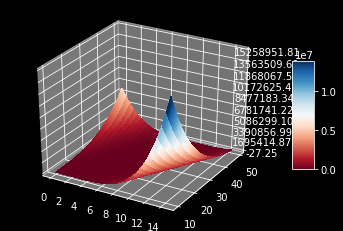

In [19]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# plot the function
x = np.arange(0,15,0.5)
y = np.arange(10,50,0.5)
X,Y = meshgrid(x, y) # grid of point
Z = f([X,Y]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("graph.png")
plt.show()


## Exact Line Search

In [11]:
def BisectionMethod(f, a=-100,b=100,epsilon=0.005) :
    iteration=0
    while (b - a) >= epsilon:
        x_1 = (a + b) / 2
        fx_1 = f(x_1)
        if f(x_1 + epsilon) <= fx_1:
            a = x_1
        else:
            b = x_1
        iteration+=1
    x_star = (a+b)/2
    return x_star

In [12]:
def ExactLineSearch(f, x0, d):
    alpha = Symbol('alpha')
    function_alpha = f(np.array(x0)+alpha*np.array(d))
    f_alp = lambdify(alpha, function_alpha, 'numpy')
    alp_star = BisectionMethod(f_alp)
    return alp_star

## Cyclic Coordinate Search

In [39]:
def np_str(x_k):
    '''
    Used to convert numpy array to string with determined format
    '''
    return np.array2string(x_k, precision=2, separator=',')

In [44]:
def CyclicCoordinateSearch(f, x0, epsilon):
    x0 = np.array(x0)
    x_array = [x0]
    k = 0
    n = len(x0)
    res_array = []
    while(True):
        y0 = np.copy(x_array[k])
        for j in range(n):
            d = np.zeros(n)
            d[j] = 1
            alpha = ExactLineSearch(f, y0, d)
            y1 = y0 + alpha*d
            res_array.append([k, np_str(x_array[k]), f(x_array[k]),j, str(d),np_str(y0), alpha, np_str(y1)])
            y0 = y1
        x_array.append(y1)
        k += 1
        if(np.linalg.norm(x_array[k]-x_array[k-1]) < epsilon):
            res_array.append([k, np_str(x_array[k]), f(x_array[k])])
            result_table = pd.DataFrame(res_array, columns=['k' ,'x^k', 'fx^k', 'j','d^j','y^j','a^j', 'y^j+1'])
            return result_table

**Solution set 1:**
*   x^0 = \[0, 0\]
*   Epsilon = 0.01

In [45]:
output1 = CyclicCoordinateSearch(f,[0,0],0.01)
output1

,k,x^k,fx^k,j,d^j,y^j,a^j,y^j+1
0,0,"[0,0]",16.000000,0.0,[1. 0.],"[0,0]",0.102234,"[0.1,0. ]"
1,0,"[0,0]",16.000000,1.0,[0. 1.],"[0.1,0. ]",1.301575,"[0.1,1.3]"
2,1,"[0.1,1.3]",13.490901,0.0,[1. 0.],"[0.1,1.3]",0.251770,"[0.35,1.3 ]"
3,1,"[0.1,1.3]",13.490901,1.0,[0. 1.],"[0.35,1.3 ]",1.258850,"[0.35,2.56]"
4,2,"[0.35,2.56]",10.332758,0.0,[1. 0.],"[0.35,2.56]",0.245667,"[0.6 ,2.56]"
...,...,...,...,...,...,...,...,...
458,229,"[ 5.93,30.45]",-27.116853,0.0,[1. 0.],"[ 5.93,30.45]",0.004578,"[ 5.94,30.45]"
459,229,"[ 5.93,30.45]",-27.116853,1.0,[0. 1.],"[ 5.94,30.45]",0.022888,"[ 5.94,30.47]"
460,230,"[ 5.94,30.47]",-27.122040,0.0,[1. 0.],"[ 5.94,30.47]",0.001526,"[ 5.94,30.47]"
461,230,"[ 5.94,30.47]",-27.122040,1.0,[0. 1.],"[ 5.94,30.47]",0.007629,"[ 5.94,30.48]"


**Solution set 2:**
*   x^0 = \[10, 35\]
*   Epsilon = 0.01

In [51]:
output2 = CyclicCoordinateSearch(f,[10,35],0.01)
output2

,k,x^k,fx^k,j,d^j,y^j,a^j,y^j+1
0,0,"[10,35]",50641.000000,0.0,[1. 0.],"[10,35]",-3.166199,"[ 6.83,35. ]"
1,0,"[10,35]",50641.000000,1.0,[0. 1.],"[ 6.83,35. ]",-0.041199,"[ 6.83,34.96]"
2,1,"[ 6.83,34.96]",-27.329070,0.0,[1. 0.],"[ 6.83,34.96]",-0.007629,"[ 6.83,34.96]"
3,1,"[ 6.83,34.96]",-27.329070,1.0,[0. 1.],"[ 6.83,34.96]",-0.038147,"[ 6.83,34.92]"
4,2,"[ 6.83,34.92]",-27.334105,0.0,[1. 0.],"[ 6.83,34.92]",-0.007629,"[ 6.82,34.92]"
...,...,...,...,...,...,...,...,...
144,72,"[ 6.48,33.21]",-27.440249,0.0,[1. 0.],"[ 6.48,33.21]",-0.004578,"[ 6.48,33.21]"
145,72,"[ 6.48,33.21]",-27.440249,1.0,[0. 1.],"[ 6.48,33.21]",-0.022888,"[ 6.48,33.19]"
146,73,"[ 6.48,33.19]",-27.440085,0.0,[1. 0.],"[ 6.48,33.19]",-0.001526,"[ 6.48,33.19]"
147,73,"[ 6.48,33.19]",-27.440085,1.0,[0. 1.],"[ 6.48,33.19]",-0.007629,"[ 6.48,33.18]"


In [54]:
print(output2[-11:].to_latex(index=False,float_format='%.3f'))

\begin{tabular}{rlrrllrl}
\toprule
  k &            x\textasciicircum k &    fx\textasciicircum k &     j &      d\textasciicircum j &            y\textasciicircum j &    a\textasciicircum j &          y\textasciicircum j+1 \\
\midrule
 69 &  [ 6.5 ,33.28] & -27.440 & 0.000 &  [1. 0.] &  [ 6.5 ,33.28] & -0.005 &  [ 6.49,33.28] \\
 69 &  [ 6.5 ,33.28] & -27.440 & 1.000 &  [0. 1.] &  [ 6.49,33.28] & -0.023 &  [ 6.49,33.26] \\
 70 &  [ 6.49,33.26] & -27.440 & 0.000 &  [1. 0.] &  [ 6.49,33.26] & -0.005 &  [ 6.49,33.26] \\
 70 &  [ 6.49,33.26] & -27.440 & 1.000 &  [0. 1.] &  [ 6.49,33.26] & -0.023 &  [ 6.49,33.23] \\
 71 &  [ 6.49,33.23] & -27.440 & 0.000 &  [1. 0.] &  [ 6.49,33.23] & -0.005 &  [ 6.48,33.23] \\
 71 &  [ 6.49,33.23] & -27.440 & 1.000 &  [0. 1.] &  [ 6.48,33.23] & -0.023 &  [ 6.48,33.21] \\
 72 &  [ 6.48,33.21] & -27.440 & 0.000 &  [1. 0.] &  [ 6.48,33.21] & -0.005 &  [ 6.48,33.21] \\
 72 &  [ 6.48,33.21] & -27.440 & 1.000 &  [0. 1.] &  [ 6.48,33.21] & -0.023 &  [ 6.48,33.19]

## Hook & Jeeves Method

In [ ]:
# code goes to here

## Simplex Search

In [6]:
def SimplexSearch():
    x=np.zeros(shape=(3,2))
    x_1=np.array([-2,15])#initial
    x_2=np.array([-8,10])#initial
    x_3=np.array([0,0])#initial
    x[0]=x_1
    x[1]=x_2
    x[2]=x_3 
    def compute_f_values(a):
        f_values=np.zeros(a.shape[0])    
        for i in range(a.shape[0]):
            f_values[i]=f(a[i])
        return f_values    
    epsilon=1
    alpha=1
    beta=0.5
    gamma=2
    
    while(True):    
        sum_value=0
        f_values=compute_f_values(x)#function values of x_matrix
        x_h=x[np.argmax(f_values)] #the worst point
        x_l=x[np.argmin(f_values)] #the best point
        index_to_go=np.argmax(f_values) #index of x_h
        mean_x=np.delete(x, index_to_go, 0)#x matrix rather than x_h
        x_mean=np.mean(mean_x,axis=0)#compute the mean of x matrix rather than x_h
        f_values_mean_x=compute_f_values(mean_x)#function values of x_matrix except x_h
        
        x_r=x_mean+alpha*(x_mean-x_h) #reflection
        
        if f(x_l)>f(x_r): #the reflected point x_r happens to be better than the current best  
            x_e=x_mean+gamma*(x_r-x_mean) #Expansion
            if f(x_r)>f(x_e): #the expanded point x_e happens to be better than the current best x_r
                x[np.argmax(f_values)]=x_e
            else:             #the expanded point is not better than x_r so we replace x_h with x_r
                x[np.argmax(f_values)]=x_r
        
        else:
            if (np.max(f_values_mean_x))>=f(x_r):
                x[np.argmax(f_values)]=x_r
            else:
                if f(x_h)>f(x_r):
                    x_h_prime=x_r
                else:
                    x_h_prime=x_h
                
                x_c=x_mean+beta*(x_h_prime-x_mean) #contraction
                if f(x_c) <= f(x_h):
                    x[np.argmax(f_values)]=x_c
                else:
                    for i in range(3):
                        x[i]=x[i]+0.5*(x_l-x[i]) #shrink operation
        
        for i in range(3):
            sum_value+=(f(x[i])-f(x_mean))**2
        print(sum_value)
        if np.sqrt(sum_value)<epsilon:
            break
                
    return x_mean

In [7]:
SimplexSearch()